In [12]:
import image_preprocessing as pp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import h5py
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
%matplotlib inline

In [2]:
img_array = pp.read_3D_volume('../CapstoneImages/A/')

In [3]:
img_array[:,:23,:23].shape

(1001, 23, 23)

In [4]:
img_array[:12].shape

(12, 200, 200)

In [5]:
img_array[0].shape

(200, 200)

In [6]:
pp.prepare_3D_dataset('../CapstoneImages/', '.' ,3000)

 Reading images from directory ../CapstoneImages/, has two sub categories ['A', 'V']
 Reading A images.
 Finish readingA images. It has 1001 images.
 Creating 3000 randomly choosen image volumes.
 Reading V images.
 Finish readingV images. It has 1001 images.
 Creating 3000 randomly choosen image volumes.
Finished creating volume data. Now saving it into hdf5 file format
 Saving file with name 3000_25_50_50.h5, at path .


In [9]:
filename = '3000_25_50_50.h5'  #here is the absolute path to the h5 file.
data = h5py.File(filename, 'r')  #read the h5 file into data.
list(data.keys())  # with this command you can see all the keys you have stored

['img_data', 'labels', 'slice_location']

In [10]:
slice_location = list(data['slice_location'])
y = list(data['labels'])

Text(0.5, 0, 'Z Label')

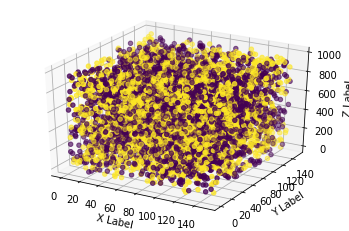

In [13]:
df3 = pd.DataFrame(slice_location, columns = ['z','x','y'])
df3['label'] = y

fig = plt.figure()
ax = plt.axes(projection='3d')
le = LabelEncoder()
le.fit(df3['label'])
label = le.transform(df3['label']) 
ax.scatter3D(df3['x'], df3['y'], df3['z'], c = label);
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [14]:
df3['z'].max()

976